<a href="https://colab.research.google.com/github/edmgjr/portifolio/blob/main/Analise_Explorat%C3%B3ria_Pre%C3%A7os_combustiveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pacotes usados neste Notebook

In [ ]:
#importando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#1.Dataset

Dataset: Gas Prices in Brazil: https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil

Este dataset contém os registros dos preços médios semanais dos combustíveis do Brasil entre os anos de 2004 e 2019.
Cada observação (registro/linha) consiste em um registro de preço aferido para um dado tipo de combustível em uma dada localidade do Brasil.
Alguns dos principais atributos (colunas) do dataset são: 'ESTADO', 'PRODUTO', 'NÚMERO DE POSTOS PESQUISADOS', 'PREÇO MÉDIO REVENDA'.

O dataset utilizado neste notebook já foi pré-processado anteriormente.

##1.1. Importando o Dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d matheusfreitag/gas-prices-in-brazil

  0% 0.00/3.15M [00:00<?, ?B/s]
100% 3.15M/3.15M [00:00<00:00, 104MB/s]


In [10]:
! unzip gas-prices-in-brazil.zip

Archive:  gas-prices-in-brazil.zip
  inflating: 2004-2019.tsv           


In [13]:
data = pd.read_csv('/content/2004-2019.tsv', sep='\t')

In [17]:
data = data.drop(columns='Unnamed: 0')
data

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0,2.756,2.756,0,6,2019
106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,3.230,3.789,0.95,0.038,2.451,0.402,1.9842,2.8661,0.164,6,2019
106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0,1.9981,1.9981,0,6,2019
106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.5093,0.07,6,2019


##1.2. Conversão de tipos de atributos

In [ ]:
data_pre.info()

In [19]:
data_pre = data.copy()

 **Datas**

Convertendo para o formato datetime

In [23]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   106823 non-null  datetime64[ns]
 1   DATA FINAL                     106823 non-null  datetime64[ns]
 2   REGIÃO                         106823 non-null  object        
 3   ESTADO                         106823 non-null  object        
 4   PRODUTO                        106823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64         
 6   UNIDADE DE MEDIDA              106823 non-null  object        
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64       
 11  

In [21]:
data_pre['DATA INICIAL'] = pd.to_datetime(data_pre['DATA INICIAL'])
data_pre['DATA FINAL'] = pd.to_datetime(data_pre['DATA FINAL'])

**Dados númericos**

Convertendo atributos para 'numeric'

In [27]:
for atributo in ['MARGEM MÉDIA REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO']:
  data_pre[atributo] = pd.to_numeric(data_pre[atributo], errors='coerce') #Em caso de erro na conversão (p. ex., uma string que não representa um número), um valor vazio (null / NaN) será atribuido no lugar

In [28]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   106823 non-null  datetime64[ns]
 1   DATA FINAL                     106823 non-null  datetime64[ns]
 2   REGIÃO                         106823 non-null  object        
 3   ESTADO                         106823 non-null  object        
 4   PRODUTO                        106823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64         
 6   UNIDADE DE MEDIDA              106823 non-null  object        
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64       
 11  

##1.3. Limpeza de dados

In [30]:
mask = data_pre['PREÇO MÉDIO DISTRIBUIÇÃO'].isnull()

In [31]:
data_pre[mask]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,2.090,NaN,0.167,NaN,NaN,NaN,NaN,NaN,9,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,2.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,2.290,NaN,0.010,NaN,NaN,NaN,NaN,NaN,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,2.200,NaN,0.018,NaN,NaN,NaN,NaN,NaN,2,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,2.300,NaN,0.030,NaN,NaN,NaN,NaN,NaN,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,3.699,NaN,0.043,NaN,NaN,NaN,NaN,NaN,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,3.890,NaN,0.094,NaN,NaN,NaN,NaN,NaN,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,3.299,NaN,0.002,NaN,NaN,NaN,NaN,NaN,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,NaN,0.028,NaN,NaN,NaN,NaN,NaN,6,2019


In [32]:
data[mask]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,2.090,-,0.167,-,-,-,-,-,9,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,2.000,-,0.000,-,-,-,-,-,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,2.290,-,0.010,-,-,-,-,-,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,2.200,-,0.018,-,-,-,-,-,2,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,2.300,-,0.030,-,-,-,-,-,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,3.699,-,0.043,-,-,-,-,-,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,3.890,-,0.094,-,-,-,-,-,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,3.299,-,0.002,-,-,-,-,-,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,-,0.028,-,-,-,-,-,6,2019


Nos dados originais os valores nulos eram hífens "-"

In [34]:
data_pre_fill = data_pre.fillna(0) #Substituindo valores nulos por 0
data_pre_fill

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0.000,2.7560,2.75600,0.000,6,2019
106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,3.230,3.789,0.950,0.038,2.451,0.402,1.9842,2.86610,0.164,6,2019
106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0.000,1.9981,1.99810,0.000,6,2019
106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.50930,0.070,6,2019


In [35]:
data_pre_fill[mask]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,2.090,0.0,0.167,0.0,0.0,0.0,0.0,0.0,9,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,2.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,2.290,0.0,0.010,0.0,0.0,0.0,0.0,0.0,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,2.200,0.0,0.018,0.0,0.0,0.0,0.0,0.0,2,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,2.300,0.0,0.030,0.0,0.0,0.0,0.0,0.0,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,3.699,0.0,0.043,0.0,0.0,0.0,0.0,0.0,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,3.890,0.0,0.094,0.0,0.0,0.0,0.0,0.0,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,3.299,0.0,0.002,0.0,0.0,0.0,0.0,0.0,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,0.0,0.028,0.0,0.0,0.0,0.0,0.0,6,2019


In [36]:
data_pre_fill = data_pre.fillna(value={
    'MARGEM MÉDIA REVENDA': 10, 
    'PREÇO MÉDIO DISTRIBUIÇÃO': 20, 
    'DESVIO PADRÃO DISTRIBUIÇÃO': 30, 
    'PREÇO MÍNIMO DISTRIBUIÇÃO': 40, 
    'PREÇO MÁXIMO DISTRIBUIÇÃO': 50, 
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO': 'vazio'
}) #Substituindo valores nulos por valores personalizados
data_pre_fill

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0.000,2.7560,2.75600,0,6,2019
106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,3.230,3.789,0.950,0.038,2.451,0.402,1.9842,2.86610,0.164,6,2019
106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0.000,1.9981,1.99810,0,6,2019
106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.50930,0.07,6,2019


In [37]:
data_pre_fill[mask]

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
1903,2005-09-25,2005-10-01,NORTE,PARA,ETANOL HIDRATADO,2,R$/l,1.694,0.283,1.690,2.090,10.0,0.167,20.0,30.0,40.0,50.0,vazio,9,2005
1958,2005-10-09,2005-10-15,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.000,0.000,2.000,2.000,10.0,0.000,20.0,30.0,40.0,50.0,vazio,10,2005
2012,2005-10-23,2005-10-29,NORTE,RORAIMA,ETANOL HIDRATADO,3,R$/l,2.277,0.023,2.250,2.290,10.0,0.010,20.0,30.0,40.0,50.0,vazio,10,2005
2497,2006-02-26,2006-03-04,NORTE,RORAIMA,ETANOL HIDRATADO,11,R$/l,2.182,0.040,2.100,2.200,10.0,0.018,20.0,30.0,40.0,50.0,vazio,2,2006
3199,2006-08-27,2006-09-02,NORTE,RORAIMA,ETANOL HIDRATADO,22,R$/l,2.285,0.068,1.980,2.300,10.0,0.030,20.0,30.0,40.0,50.0,vazio,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106664,2019-06-16,2019-06-22,SUDESTE,MINAS GERAIS,GNV,5,R$/m3,3.445,0.147,3.347,3.699,10.0,0.043,20.0,30.0,40.0,50.0,vazio,6,2019
106666,2019-06-16,2019-06-22,SUL,PARANA,GNV,7,R$/m3,3.132,0.295,3.049,3.890,10.0,0.094,20.0,30.0,40.0,50.0,vazio,6,2019
106811,2019-06-23,2019-06-29,SUDESTE,ESPIRITO SANTO,GNV,4,R$/m3,3.299,0.005,3.290,3.299,10.0,0.002,20.0,30.0,40.0,50.0,vazio,6,2019
106813,2019-06-23,2019-06-29,SUDESTE,MINAS GERAIS,GNV,6,R$/m3,3.548,0.100,3.495,3.699,10.0,0.028,20.0,30.0,40.0,50.0,vazio,6,2019


A fim de não ter valores sintéticos gerados pelo `fillna`, que possam atrapalhar a análise, será removido (`dropna`) todas as amostras que possuem qualquer valor **NaN** para quaisquer atributos/colunas.





In [38]:
data_pre.dropna(inplace=True)

In [39]:
data_pre[mask]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO


In [40]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103392 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   103392 non-null  datetime64[ns]
 1   DATA FINAL                     103392 non-null  datetime64[ns]
 2   REGIÃO                         103392 non-null  object        
 3   ESTADO                         103392 non-null  object        
 4   PRODUTO                        103392 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   103392 non-null  int64         
 6   UNIDADE DE MEDIDA              103392 non-null  object        
 7   PREÇO MÉDIO REVENDA            103392 non-null  float64       
 8   DESVIO PADRÃO REVENDA          103392 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           103392 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           103392 non-null  float64       
 11  

In [42]:
data = data_pre.copy()

#2. Análise Exploratória de Dados

##2.1. Como os preços da Gasolina Comum em São Paulo variaram em 2018?

In [43]:
df = data.query('ESTADO == "SAO PAULO" and ANO == 2018 and PRODUTO == "GASOLINA COMUM"').reset_index(drop=True)

In [44]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2018-01-07,2018-01-13,SUDESTE,SAO PAULO,GASOLINA COMUM,1641,R$/l,3.988,0.156,3.499,4.599,0.411,0.039,3.577,0.104,2.990,3.9510,0.029,1,2018
1,2018-01-14,2018-01-20,SUDESTE,SAO PAULO,GASOLINA COMUM,1648,R$/l,4.002,0.155,3.549,4.499,0.412,0.039,3.590,0.102,2.990,3.9014,0.028,1,2018
2,2018-01-21,2018-01-27,SUDESTE,SAO PAULO,GASOLINA COMUM,1648,R$/l,4.006,0.160,3.499,4.899,0.410,0.040,3.596,0.102,2.990,3.9014,0.028,1,2018
3,2018-01-28,2018-02-03,SUDESTE,SAO PAULO,GASOLINA COMUM,1644,R$/l,4.019,0.156,3.579,4.699,0.423,0.039,3.596,0.107,2.924,3.9537,0.030,1,2018
4,2018-02-04,2018-02-10,SUDESTE,SAO PAULO,GASOLINA COMUM,1646,R$/l,4.004,0.157,3.579,4.597,0.416,0.039,3.588,0.102,2.990,3.9537,0.028,2,2018


**Estatisticas Descritivas**

In [45]:
df.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.00000,52.000000,52.000000,52.000000,52.0
mean,1610.211538,4.202769,0.175500,3.671500,4.975750,0.442481,0.041750,3.760288,0.109654,3.31295,4.139454,0.029096,6.615385,2018.0
std,213.627432,0.180672,0.017955,0.163808,0.211198,0.063271,0.003965,0.163664,0.010712,0.26684,0.195897,0.002460,3.470627,0.0
min,102.000000,3.970000,0.150000,3.369000,4.499000,0.366000,0.034000,3.563000,0.087000,2.92400,3.887500,0.023000,1.000000,2018.0
25%,1639.000000,4.008000,0.159750,3.499000,4.899000,0.404500,0.039000,3.620250,0.102000,2.99000,3.965775,0.028000,4.000000,2018.0
50%,1642.000000,4.202000,0.173000,3.679000,4.999000,0.421500,0.040000,3.756500,0.108000,3.35000,4.095500,0.029000,7.000000,2018.0
75%,1644.000000,4.336250,0.189000,3.784000,5.099000,0.470250,0.044000,3.862250,0.116250,3.53250,4.259000,0.030000,9.250000,2018.0
max,1649.000000,4.512000,0.216000,3.969000,5.299000,0.640000,0.051000,4.085000,0.144000,3.76000,4.551000,0.037000,12.000000,2018.0


In [46]:
df['PREÇO MÉDIO REVENDA'].describe()

count    52.000000
mean      4.202769
std       0.180672
min       3.970000
25%       4.008000
50%       4.202000
75%       4.336250
max       4.512000
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [47]:
df['PREÇO MÉDIO REVENDA'].describe().to_frame()

,PREÇO MÉDIO REVENDA
count,52.000000
mean,4.202769
std,0.180672
min,3.970000
25%,4.008000
50%,4.202000
75%,4.336250
max,4.512000


**Tendência Central dos Preços**

In [49]:
print(f'O preço médio da Gasolina no Estado de São Paulo em 2018 foi de R$ {df["PREÇO MÉDIO REVENDA"].mean():.2f} ± {df["PREÇO MÉDIO REVENDA"].std():.2f}')

O preço médio da Gasolina no Estado de São Paulo em 2018 foi de R$ 4.20 ± 0.18


Text(0, 0.5, 'Preço Médio (R$)')

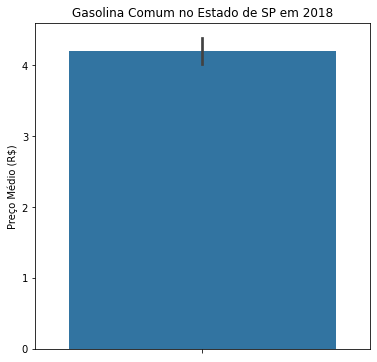

In [50]:
plt.figure(figsize=(6,6))
ax = sns.barplot(y='PREÇO MÉDIO REVENDA', ci='sd', data=df)
ax.set_title('Gasolina Comum no Estado de SP em 2018')
ax.set_ylabel('Preço Médio (R$)')

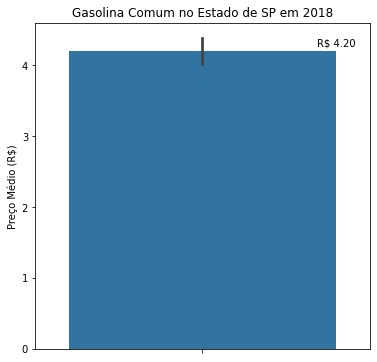

In [51]:
#Técnica para colocar o valor da variável em cima da barra

plt.figure(figsize=(6,6))
ax = sns.barplot(y='PREÇO MÉDIO REVENDA', ci='sd', data=df)
ax.set_title('Gasolina Comum no Estado de SP em 2018')
ax.set_ylabel('Preço Médio (R$)')

for bar in ax.patches:
  height = bar.get_height()
  x = bar.get_x() + bar.get_width()
  y = height
  ax.annotate(f'R$ {height:.2f}',
              xy = (x,y),
              xytext=(0,3),
              textcoords='offset points',
              ha = 'center', va = 'bottom')

In [53]:
print(f'A mediana do preço da Gasolina Comum no estado de SP em 2018 foi R$ {df["PREÇO MÉDIO REVENDA"].median():.2f}')

A mediana do preço da Gasolina Comum no estado de SP em 2018 foi R$ 4.20


**Variabilidade**

Histograma com número de bins padrão:

Text(0, 0.5, 'Frequência')

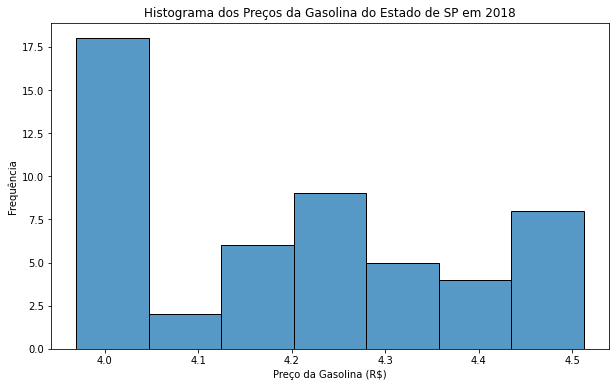

In [55]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Histograma dos Preços da Gasolina do Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')
ax.set_ylabel('Frequência')

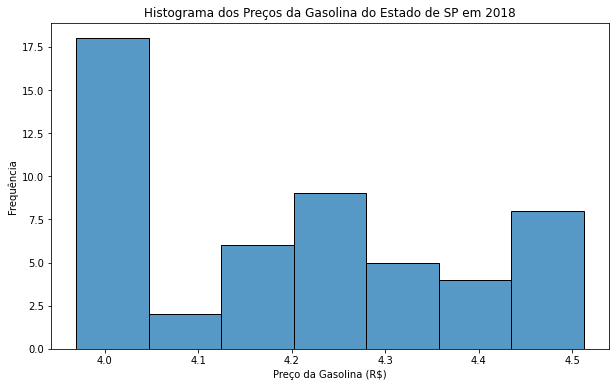

In [57]:
#Alterando o número de ticks
plt.figure(figsize=(10,6))
ax = sns.histplot(x='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Histograma dos Preços da Gasolina do Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')
ax.set_ylabel('Frequência')
ax.set_xticks(np.arange(4,4.6,0.1))

**Alterando o número de bins do Histrograma.**

Text(0, 0.5, 'Frequência')

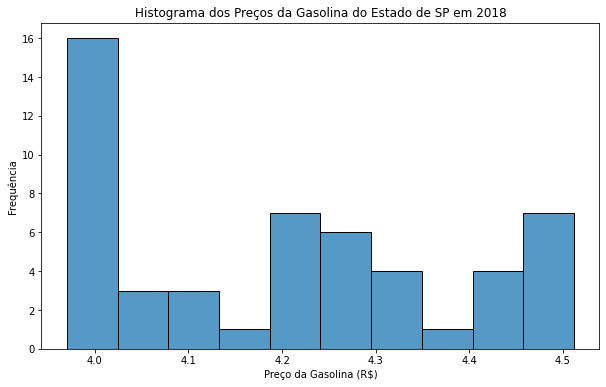

In [58]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x='PREÇO MÉDIO REVENDA', data=df, bins = 10)
ax.set_title('Histograma dos Preços da Gasolina do Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')
ax.set_ylabel('Frequência')

**Checando a variabilidade usando Boxplots**

Text(0.5, 0, 'Preço da Gasolina (R$)')

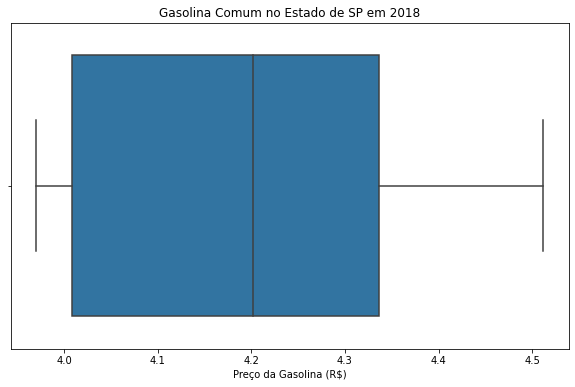

In [60]:
#Checando a variabilidade da distribuição dos preços médios de revenda do estado de SP em 2018
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Gasolina Comum no Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')

**Checando a variabilidade usando Violin Plot**

Text(0.5, 0, 'Preço da Gasolina (R$)')

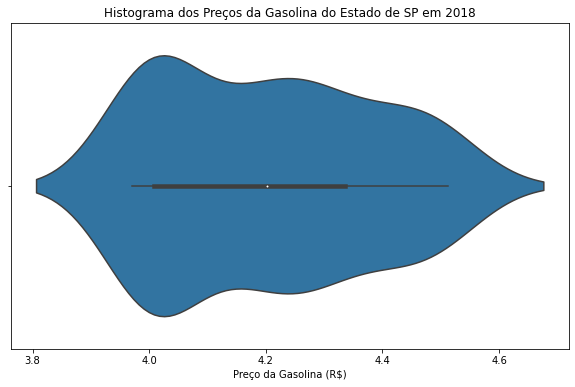

In [62]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x='PREÇO MÉDIO REVENDA', data=df)
ax.set_title('Histograma dos Preços da Gasolina do Estado de SP em 2018')
ax.set_xlabel('Preço da Gasolina (R$)')

##2.2. Como os preços da Gasolina Comum e do Etanol em São Paulo variaram em 2018?

In [67]:
df = data.query('ESTADO == "SAO PAULO" and ANO == 2018 and PRODUTO in ["GASOLINA COMUM", "ETANOL HIDRATADO"]').reset_index(drop=True)

In [68]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2018-01-07,2018-01-13,SUDESTE,SAO PAULO,ETANOL HIDRATADO,1664,R$/l,2.833,0.139,2.449,3.399,0.338,0.049,2.495,0.092,2.1842,2.8833,0.037,1,2018
1,2018-01-07,2018-01-13,SUDESTE,SAO PAULO,GASOLINA COMUM,1641,R$/l,3.988,0.156,3.499,4.599,0.411,0.039,3.577,0.104,2.9900,3.9510,0.029,1,2018
2,2018-01-14,2018-01-20,SUDESTE,SAO PAULO,ETANOL HIDRATADO,1661,R$/l,2.868,0.134,2.399,3.399,0.331,0.047,2.537,0.087,2.2600,2.8471,0.034,1,2018
3,2018-01-14,2018-01-20,SUDESTE,SAO PAULO,GASOLINA COMUM,1648,R$/l,4.002,0.155,3.549,4.499,0.412,0.039,3.590,0.102,2.9900,3.9014,0.028,1,2018
4,2018-01-21,2018-01-27,SUDESTE,SAO PAULO,ETANOL HIDRATADO,1662,R$/l,2.874,0.135,2.399,3.399,0.324,0.047,2.550,0.095,1.6900,2.9722,0.037,1,2018


**Computando as estatísticas descritivas**

In [70]:
stats = df.groupby('PRODUTO')['PREÇO MÉDIO REVENDA'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
PRODUTO,,,,,,,,
ETANOL HIDRATADO,52.0,2.711904,0.141365,2.393,2.6315,2.720,2.83825,2.892
GASOLINA COMUM,52.0,4.202769,0.180672,3.970,4.0080,4.202,4.33625,4.512
